In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
import numpy as np
from data_prep_functions import wine_prep
from plotting_functions import nn_plot_mse
from enkf_functions import enkf_regressor_analysis
import reproducible

In [4]:
X_train, X_test, y_train, y_test = wine_prep()

In [5]:
layers = 4
neurons = [32, 32, 16, 1]

# Regularization

In [6]:
setting_dict = {"particles": 100,
                "epochs": 20,
                "batch_size": len(X_train), 
                "h_0": 2,
                "epsilon": 0.5,
                "shuffle": True,
                "early_stopping": None
               }

In [7]:
analysis_dict = {"disjoint_batch": True,
                 "batch_particle_connection": {"connect": False,
                                               "shuffle": "particle"},
                 "tikhonov": {"regularize": True,
                              "lambda": 1}
                }

In [8]:
np.random.seed(42)
reg_model = enkf_regressor_analysis(X_train,
                                    X_test,
                                    y_train,
                                    y_test,
                                    layers,
                                    neurons,
                                    setting_dict,
                                    analysis_dict,
                                    save_all = False,
                                    file_var = None,
                                    file_model = None,
                                    verbose = 1)

Epoch 1. Training MSE: 17.026, Test MSE: 17.035.
Epoch 2. Training MSE: 8.826, Test MSE: 8.832.
Epoch 3. Training MSE: 5.243, Test MSE: 5.248.
Epoch 4. Training MSE: 3.622, Test MSE: 3.625.
Epoch 5. Training MSE: 2.765, Test MSE: 2.765.
Epoch 6. Training MSE: 2.131, Test MSE: 2.126.
Epoch 7. Training MSE: 1.644, Test MSE: 1.634.
Epoch 8. Training MSE: 1.324, Test MSE: 1.313.
Epoch 9. Training MSE: 1.102, Test MSE: 1.092.
Epoch 10. Training MSE: 0.965, Test MSE: 0.956.
Epoch 11. Training MSE: 0.874, Test MSE: 0.869.
Epoch 12. Training MSE: 0.805, Test MSE: 0.804.
Epoch 13. Training MSE: 0.753, Test MSE: 0.757.
Epoch 14. Training MSE: 0.719, Test MSE: 0.729.
Epoch 15. Training MSE: 0.696, Test MSE: 0.713.
Epoch 16. Training MSE: 0.678, Test MSE: 0.7.
Epoch 17. Training MSE: 0.661, Test MSE: 0.689.
Epoch 18. Training MSE: 0.646, Test MSE: 0.679.
Epoch 19. Training MSE: 0.634, Test MSE: 0.67.
Epoch 20. Training MSE: 0.623, Test MSE: 0.66.


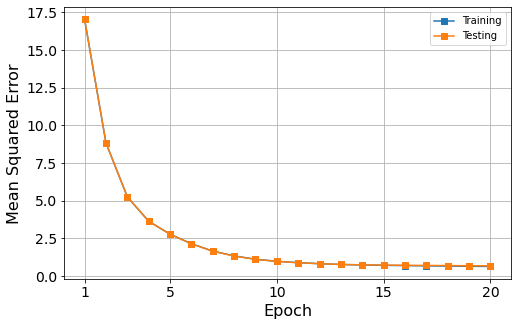

In [9]:
nn_plot_mse(reg_model,
            mse_mean = None,
            start_epoch = 1,
            save = None)

# Batch-Particle-Coupling

In [10]:
setting_dict = {"particles": 181,
                "epochs": 20,
                "batch_size": 23,   
                "h_0": 2,
                "epsilon": 0.5,
                "shuffle": True,
                "early_stopping": None
               }

In [11]:
analysis_dict = {"disjoint_batch": True,
                 "batch_particle_connection": {"connect": True,
                                               "shuffle": "particle"}, 
                 "tikhonov": {"regularize": False,
                              "lambda": 1}
                }

In [12]:
np.random.seed(42)
bpc_model = enkf_regressor_analysis(X_train,
                                    X_test,
                                    y_train,
                                    y_test,
                                    layers,
                                    neurons,
                                    setting_dict,
                                    analysis_dict,
                                    save_all = False,
                                    file_var = None,
                                    file_model = None,
                                    verbose = 1)

Epoch 1. Training MSE: 17.696, Test MSE: 17.706.
Epoch 2. Training MSE: 9.214, Test MSE: 9.221.
Epoch 3. Training MSE: 5.652, Test MSE: 5.658.
Epoch 4. Training MSE: 3.813, Test MSE: 3.817.
Epoch 5. Training MSE: 3.121, Test MSE: 3.123.
Epoch 6. Training MSE: 2.816, Test MSE: 2.817.
Epoch 7. Training MSE: 2.497, Test MSE: 2.495.
Epoch 8. Training MSE: 2.409, Test MSE: 2.403.
Epoch 9. Training MSE: 2.121, Test MSE: 2.111.
Epoch 10. Training MSE: 1.975, Test MSE: 1.961.
Epoch 11. Training MSE: 1.826, Test MSE: 1.81.
Epoch 12. Training MSE: 1.731, Test MSE: 1.714.
Epoch 13. Training MSE: 1.666, Test MSE: 1.647.
Epoch 14. Training MSE: 1.618, Test MSE: 1.598.
Epoch 15. Training MSE: 1.541, Test MSE: 1.52.
Epoch 16. Training MSE: 1.474, Test MSE: 1.453.
Epoch 17. Training MSE: 1.414, Test MSE: 1.393.
Epoch 18. Training MSE: 1.385, Test MSE: 1.362.
Epoch 19. Training MSE: 1.365, Test MSE: 1.341.
Epoch 20. Training MSE: 1.329, Test MSE: 1.304.


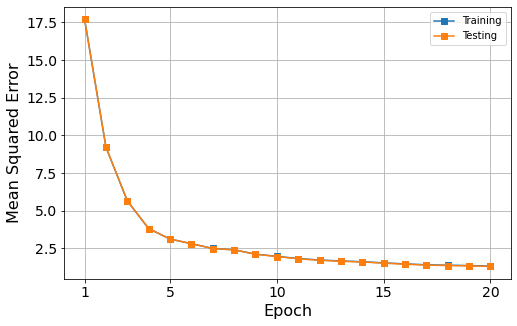

In [13]:
nn_plot_mse(bpc_model,
            mse_mean = None,
            start_epoch = 1,
            save = None)